In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

words = open("60knames.csv",'r').read().splitlines()[1:] # col name removed
# words = open("names.txt",'r').read().splitlines()
words = [word for word in words if not any(char in word for char in ['/','"',',','-',".","/",";",'±','Ã'])]

stoi = {c:i+1 for i,c in enumerate(sorted(set("".join(words))))}
stoi['.'] = 0
itos = {v:k for k,v in stoi.items()}

context_size = 3
inp = []
out = []

for word in words:
    context = context_size * '.'
    for ch in word + '.':
        int_inp = [stoi[ch] for ch in context]
        inp.append(int_inp)
        out.append(stoi[ch])
        # print(f'{context} -> {ch}')
        context = context[1:] + ch
# print(inp, out)

inp = torch.tensor(inp)
out = torch.tensor(out)

# inp.shape, out.shape, itos

In [2]:
g = torch.Generator().manual_seed(16)
C = torch.randn((27,2),generator = g)

print(C.shape, inp.shape)
emb = C[inp]

# emb_squeze = torch.cat((emb[:,0,:],emb[:,1,:],emb[:,2,:]),1)
# emb_squeze = torch.cat(torch.unbind(emb,1),1)
emb_squeze = emb.view(-1,6)


W = torch.randn((6,100),generator = g)
b = torch.randn((100),generator = g)
h = torch.tanh(emb_squeze @ W + b)
emb.shape, emb_squeze.shape, h

torch.Size([27, 2]) torch.Size([545276, 3])


(torch.Size([545276, 3, 2]),
 torch.Size([545276, 6]),
 tensor([[-0.9095,  0.5782,  0.8243,  ..., -0.6878,  0.1295,  0.9889],
         [-0.9889,  0.9608,  0.9988,  ...,  0.9638,  0.7905,  0.8400],
         [-0.9968, -0.8177,  1.0000,  ...,  0.9754,  0.9431, -0.3990],
         ...,
         [ 0.8689, -0.9999,  0.6473,  ..., -0.9399, -0.9737, -0.9988],
         [ 1.0000, -0.1347,  0.2265,  ..., -0.6924, -0.9658, -0.9838],
         [ 0.9997, -0.9998, -1.0000,  ..., -0.9999, -0.9946, -0.9828]]))

In [3]:
g = torch.Generator().manual_seed(16)
W2 = torch.randn((100,27),generator = g)
b2 = torch.randn((27),generator = g)

logits = h @ W2 + b2

# counts = logits.exp()
# p_counts = counts/counts.sum(1,keepdim= True)
# loss = -p_counts[torch.arange(5),out].log().mean()

loss = F.cross_entropy(logits,out)
loss

tensor(18.3917)

In [4]:
g = torch.Generator().manual_seed(16)
C = torch.randn((27,2),generator = g)


W = torch.randn((6,100),generator = g)
b = torch.randn((100),generator = g)
W2 = torch.randn((100,27),generator = g)
b2 = torch.randn((27),generator = g)

param = [W,b,W2,b2]

for p in param:
    p.requires_grad = True

In [5]:
lre = torch.linspace(-3,0,1000)
lrs = 10 ** lre

In [6]:
sum(p.nelement() for p in param)

3427

In [7]:
lri = []
lossi =[]
for i in range(10000):
    ix = torch.randint(0,len(inp),(32,))
    emb = C[inp[ix]]
    h = torch.tanh(emb.view(-1,6) @ W + b)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,out[ix])
    
    for p in param:
        p.grad = None
        
    loss.backward()
    # lr = lrs[i]
    
    for p in param:
        # p.data += -lr * p.grad
        p.data += -.1 * p.grad
    # lri.append(lre[i])
    lossi.append(loss.item())
    # print(loss.item())
# print(lossi[-1])

2.6019694805145264

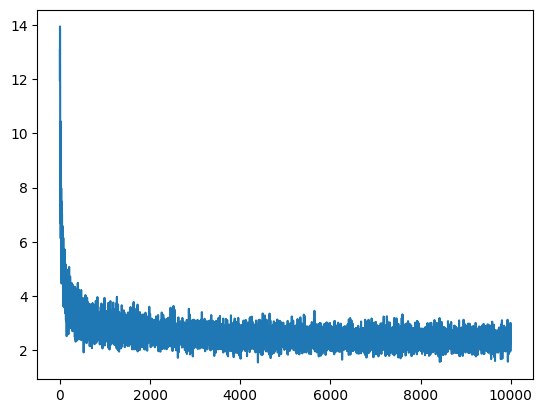

In [8]:
# plt.figure(figsize=(6,6))
plt.plot(list(range(1,10000)),lossi[1:])
lossi[-1]

In [9]:
g = torch.Generator().manual_seed(16)
for i in range(20):
    output = []
    context = [0,0,0]
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W + b)
        logits = h @ W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs,num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        output.append(ix)
        if ix==0:
            break
    print("".join(itos[ch] for ch in output))

EAR.
MRUAPAN.
XHRIYA.
MITHIKASHBMAAMI.
VISRYUL.
VIVIDDSIVANA.
NALPA.
JASTMYHA.
SI.
TRIVAN.
SUDESH.
ROSHAESH.
YRANAYLOVAN.
DATI.
DI.
.
PRAR.
RMARAN.
JHRI.
VIPR.
